### Data Cleaning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
df = pd.read_csv('../data/data.tsv', sep = '\t')

In [3]:
df = df.loc[:, ['TRACT', 'POP2000', 'POP2004','POV', 'MALE', 'FEMALE', 'STORE_BG', 'NIGHT_BG', 'TAVERN_BG', 'REST_BG', 'DVWEEKEND', 'DVENDNIGHT', 'DVWEEKNIGHT', 'UNEMPL', 'DV05', 'DV06']]

In [4]:
df['DV'] = df['DV05'] + df['DV06']

In [5]:
df['TOTAL_BG'] = df['STORE_BG'] + df['NIGHT_BG'] + df['TAVERN_BG'] + df['REST_BG']

In [6]:
df['AVG_POP'] = (df['POP2000'] + df['POP2004'])/2

In [7]:
df.drop(['STORE_BG', 'NIGHT_BG', 'TAVERN_BG', 'REST_BG', 'DV05', 'DV06', 'POP2000', 'POP2004'], axis = 1, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 11 columns):
TRACT          431 non-null int64
POV            431 non-null float64
MALE           431 non-null float64
FEMALE         431 non-null float64
DVWEEKEND      431 non-null int64
DVENDNIGHT     431 non-null int64
DVWEEKNIGHT    431 non-null int64
UNEMPL         431 non-null float64
DV             431 non-null int64
TOTAL_BG       431 non-null int64
AVG_POP        431 non-null float64
dtypes: float64(5), int64(6)
memory usage: 37.2 KB


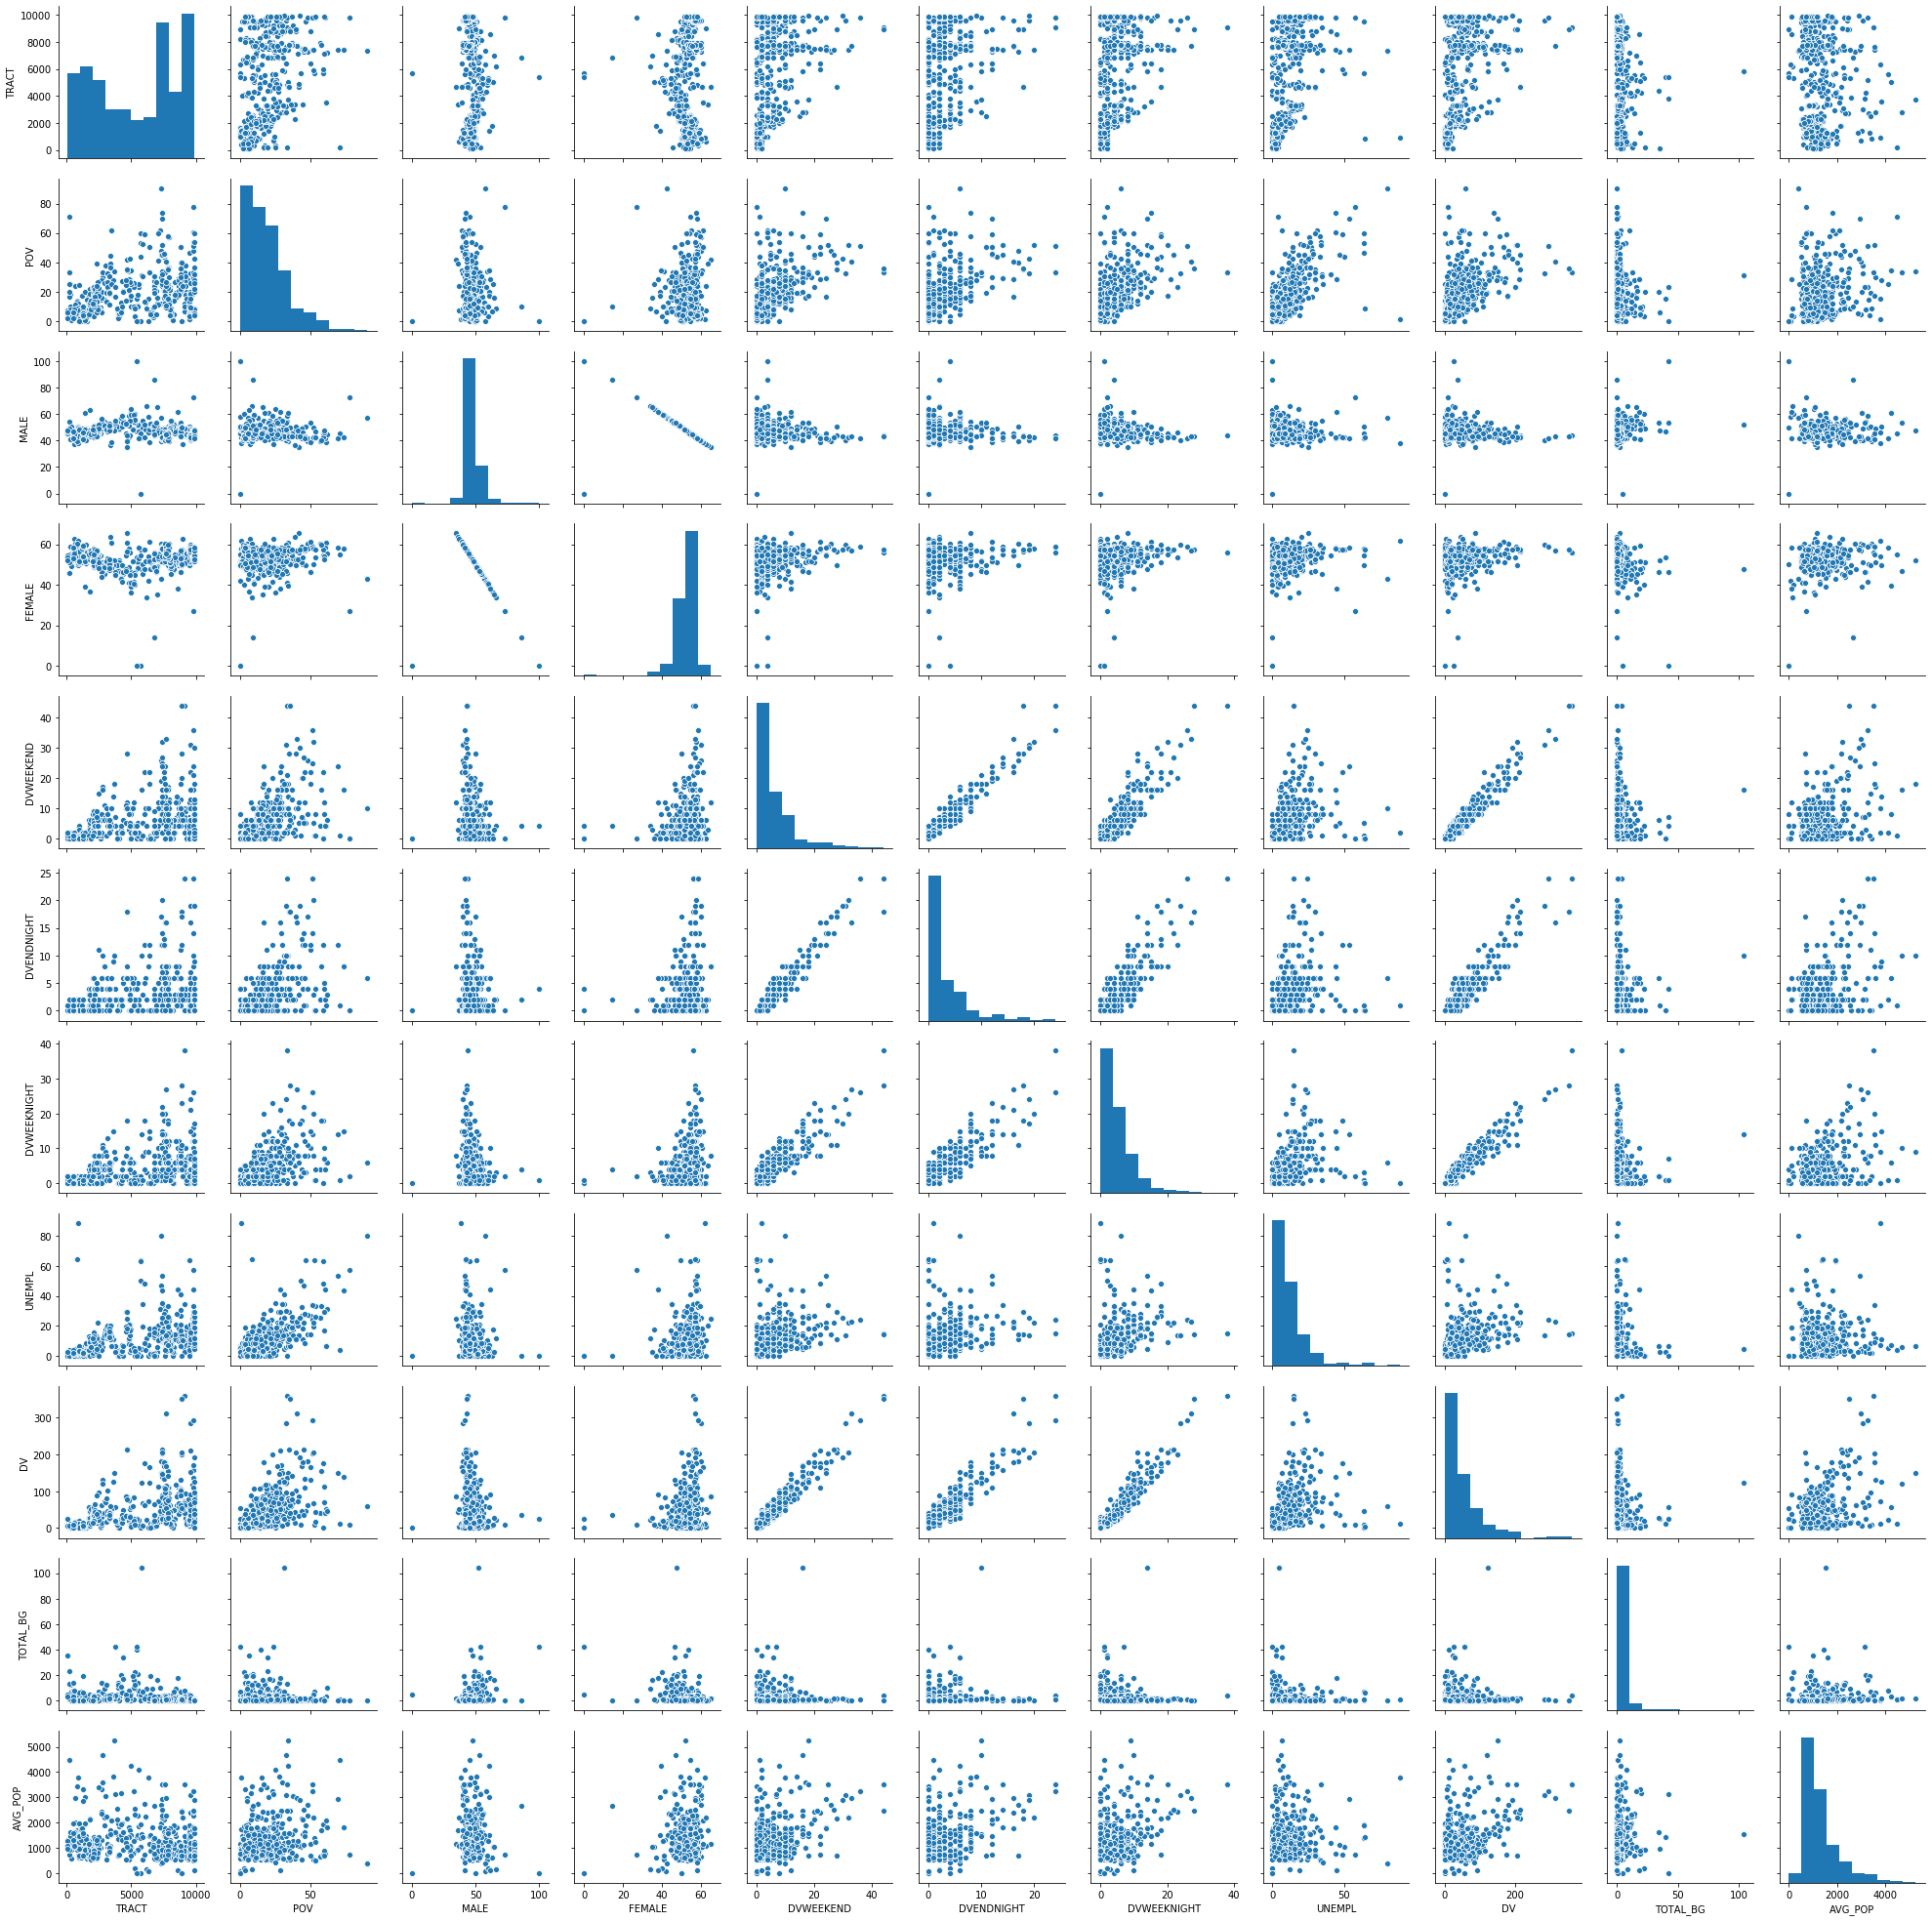

In [9]:
sns.pairplot(df)

In [10]:
df.head()

,TRACT,POV,MALE,FEMALE,DVWEEKEND,DVENDNIGHT,DVWEEKNIGHT,UNEMPL,DV,TOTAL_BG,AVG_POP
0,4801,33.70,58.92,41.08,3,0,1,10.49,19,2,539.5
1,100,7.09,48.04,51.96,0,0,1,2.32,4,3,1305.5
2,5500,10.72,48.73,51.27,2,2,0,1.12,14,14,2267.0
3,5401,14.91,46.51,53.49,0,0,1,2.51,13,40,1443.0
4,4902,28.22,53.10,46.90,0,0,0,20.68,10,0,830.5


In [11]:
stats.f_oneway(df.DVWEEKEND, df.DVENDNIGHT, df.DVWEEKNIGHT)

F_onewayResult(statistic=26.99615633409954, pvalue=3.269166486153715e-12)

In [12]:
df['ALC_AVAIL_POP'] = df.TOTAL_BG / df.AVG_POP

In [13]:
df.head()

,TRACT,POV,MALE,FEMALE,DVWEEKEND,DVENDNIGHT,DVWEEKNIGHT,UNEMPL,DV,TOTAL_BG,AVG_POP,ALC_AVAIL_POP
0,4801,33.70,58.92,41.08,3,0,1,10.49,19,2,539.5,0.003707
1,100,7.09,48.04,51.96,0,0,1,2.32,4,3,1305.5,0.002298
2,5500,10.72,48.73,51.27,2,2,0,1.12,14,14,2267.0,0.006176
3,5401,14.91,46.51,53.49,0,0,1,2.51,13,40,1443.0,0.027720
4,4902,28.22,53.10,46.90,0,0,0,20.68,10,0,830.5,0.000000


In [14]:
total_df = pd.read_csv('../data/data.tsv', sep = '\t')

In [15]:
total_df
np.array(total_df[total_df.columns[4]])
len(total_df.columns)

103

In [16]:
X_array_list = []
for index in range(len(total_df.columns)):
    X_array_list.append(np.array(total_df[total_df.columns[index]]))
print(np.array(X_array_list).shape)

np.array([total_df.AVGDV]).shape

(103, 431)


(1, 431)

In [17]:
# Linear Regression on all 103 variables in original dataset
X = total_df.drop(columns='AVGDV')
y = total_df.AVGDV
lr = LinearRegression(fit_intercept= False)

lr.fit(X,y)

mod = sm.OLS(y, X)
res = mod.fit()
# print(res.summary())

In [18]:
total_df.describe()

,OBJECTID,UIDIS05,UIDIS06,MPDDIS05,MPDDIS06,VACANTPERCENT,STATE_FIPS,TRACT,BLKGRP,POP2000,...,NOTALLOWS_SQMI,ALLOWS_SQMI,PCTNOTALLOW,ARR_0506,ADW05,ADW06,ADW00,ADW01,DV05,DV06
count,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.0,431.000000,431.000000,431.000000,...,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000
mean,217.916473,71.296984,69.037123,188.561485,188.619490,0.077545,11.0,5449.570766,2.552204,1315.111369,...,1.433411,13.456068,4.996133,213.271462,7.164733,7.475638,9.097448,8.853828,25.227378,23.951276
std,124.702371,62.143532,61.978155,201.020675,213.721312,0.104750,0.0,3227.266253,1.617186,780.337868,...,9.326861,20.618144,18.541977,281.883471,7.893080,8.609553,10.849060,10.480967,28.442832,26.873086
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,11.0,100.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.500000,29.500000,25.000000,64.000000,59.500000,0.016581,11.0,2102.000000,1.000000,782.000000,...,0.000000,0.000000,0.000000,61.000000,2.000000,2.000000,2.000000,2.000000,6.000000,6.000000
50%,218.000000,52.000000,51.000000,132.000000,132.000000,0.039437,11.0,5900.000000,2.000000,1110.000000,...,0.000000,4.615385,0.000000,128.000000,4.000000,5.000000,5.000000,5.000000,17.000000,15.000000
75%,325.500000,94.500000,92.500000,248.000000,252.500000,0.089487,11.0,8200.000000,3.000000,1559.500000,...,0.000000,20.000000,0.000000,259.500000,10.000000,10.000000,12.000000,13.000000,34.500000,32.500000
max,433.000000,419.000000,389.000000,2395.000000,2822.000000,0.761905,11.0,9907.000000,8.000000,4990.000000,...,166.666667,133.333333,100.000000,3302.000000,44.000000,57.000000,69.000000,80.000000,193.000000,186.000000


In [19]:
#Backward Feature Selection (getting rid of unnecessary/redundant columns)
clean_df = total_df.drop(columns = ['OBJECTID', 'TRACT', 'BLKGRP', 'DV05', 'DV06', 'DVWEEKEND', 'DVWEEKNIGHT', 'DVENDNIGHT'])

In [20]:
#Linear regression with clean_df
X = clean_df.drop(columns='AVGDV')
y = clean_df.AVGDV
lr = LinearRegression(fit_intercept= False)

lr.fit(X,y)

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  AVGDV   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     43.23
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          6.96e-142
Time:                        14:10:12   Log-Likelihood:                -1503.6
No. Observations:                 431   AIC:                             3181.
Df Residuals:                     344   BIC:                             3535.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
UIDIS05              1.4051      0.661  

In [21]:
clean_df.corr()

,UIDIS05,UIDIS06,MPDDIS05,MPDDIS06,VACANTPERCENT,STATE_FIPS,POP2000,POP2004,POP00_SQMI,POP04_SQMI,...,MPDWEEKEND,NO_SINGLES,NOTALLOWS_SQMI,ALLOWS_SQMI,PCTNOTALLOW,ARR_0506,ADW05,ADW06,ADW00,ADW01
UIDIS05,1.000000,0.927003,0.830745,0.800239,0.201864,NaN,0.401863,0.401614,0.110917,0.117431,...,0.784998,0.045093,-0.001403,0.157993,0.043912,0.641504,0.802260,0.780551,0.763292,0.729182
UIDIS06,0.927003,1.000000,0.819263,0.793706,0.207490,NaN,0.444720,0.447309,0.131250,0.139657,...,0.792868,0.050947,0.022556,0.144352,0.031576,0.630918,0.813097,0.821319,0.821541,0.784670
MPDDIS05,0.830745,0.819263,1.000000,0.971742,0.080605,NaN,0.361652,0.367905,0.187713,0.194639,...,0.961722,0.109185,0.069872,0.276145,0.071737,0.650552,0.706792,0.735891,0.702189,0.691054
MPDDIS06,0.800239,0.793706,0.971742,1.000000,0.069796,NaN,0.342821,0.346730,0.162720,0.167534,...,0.961596,0.116486,0.080380,0.259377,0.076799,0.642678,0.683528,0.723320,0.683236,0.680175
VACANTPERCENT,0.201864,0.207490,0.080605,0.069796,1.000000,NaN,-0.102058,-0.084832,-0.276905,-0.268042,...,0.043105,-0.085813,-0.069021,-0.145297,-0.062168,0.203550,0.196526,0.194133,0.247416,0.256370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ARR_0506,0.641504,0.630918,0.650552,0.642678,0.203550,NaN,0.184330,0.197255,0.020561,0.028829,...,0.620258,-0.000372,-0.007949,0.153451,-0.016486,1.000000,0.623512,0.638114,0.610609,0.584707
ADW05,0.802260,0.813097,0.706792,0.683528,0.196526,NaN,0.400370,0.404419,0.126642,0.131143,...,0.682808,0.033690,0.004021,0.099262,0.017219,0.623512,1.000000,0.882386,0.816363,0.787244
ADW06,0.780551,0.821319,0.735891,0.723320,0.194133,NaN,0.397545,0.406789,0.172540,0.180622,...,0.706016,0.039253,0.027984,0.134069,-0.004674,0.638114,0.882386,1.000000,0.817964,0.782465
ADW00,0.763292,0.821541,0.702189,0.683236,0.247416,NaN,0.424560,0.432478,0.143021,0.149320,...,0.672003,-0.003944,-0.003918,0.142098,-0.034873,0.610609,0.816363,0.817964,1.000000,0.893494


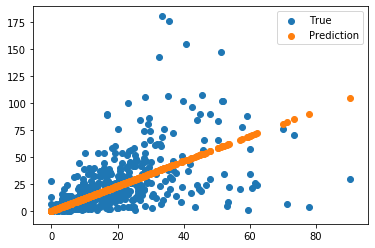

In [26]:
# test linear regression with one variable (POV)
X = np.array(clean_df.POV).reshape(-1,1)
y = clean_df.AVGDV
lr = LinearRegression(fit_intercept= False)

lr.fit(X,y)
lr.intercept_
y_pred = lr.predict(X)

plt.scatter(X,y, label="True")
plt.scatter(X, y_pred, label='Prediction')
plt.legend()

In [27]:
lr.coef_

array([1.15360119])

In [28]:
#columns dropped that are unnecessary and redundant
new_df = total_df.drop(columns=['OBJECTID', 'TRACT', 'STATE_FIPS','BLKGRP', 'DV05', 'DV06', 'DVWEEKEND', 'DVWEEKNIGHT', 'DVENDNIGHT', 'METRODUMMY', 'PUBHOUSINGDUMMY'])

In [74]:
#columns dropped due to multicollinearity
new_df2 = new_df.drop(columns=['AVGADW0506','MPDDIS06','UIWEEKNIGH','UIWEEKEND','UIWEEKNIGH','UIENDNIGHT','MPDWEEKNIG', 'ADW06','AVGUIDISOR','AGE_UNDER5','MPDWENDNIG', 'MPDWEEKEND','UIDIS05', 'UIDIS06', 'MPDDIS05', 'POP2000', 'POP00_SQMI', 'ADW05', 'ADW00', 'ADW01', 'BUSSTOP_SQMI', 'SHAPE_LENG', 'SHAPE_AREA'])

In [75]:
#Preprocessing data using sklearn standard scaler

from sklearn.preprocessing import StandardScaler
data = new_df.drop(columns='AVGDV')
scaler = StandardScaler()
print(scaler.fit(data))
print(scaler.transform(data))
scaled_x = scaler.transform(data)
scaled_x.shape
scaled_df = pd.DataFrame(scaled_x, columns = data.columns)

StandardScaler(copy=True, with_mean=True, with_std=True)
[[ 0.26909361  0.71015291  0.17151737 ... -0.17159461  0.26785041
   0.30052836]
 [-0.9230819  -0.67904531 -0.54565933 ... -0.75301974 -0.56267857
  -0.75021275]
 [ 0.10798881  0.11247461  0.62971359 ... -0.28787964 -0.28583557
  -0.27260316]
 ...
 [ 1.83181014  1.29167775  0.55998808 ...  1.68896582  1.0060984
   0.96918179]
 [-0.08533695 -0.27520861 -0.2518161  ... -0.52044969 -0.00899258
  -0.36812507]
 [-0.58476182 -0.54981757  0.81896855 ... -0.28787964 -0.47039757
  -0.84573467]]


In [76]:
#Feature selection using sklearn Lasso & feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
X = scaled_x
y = new_df.AVGDV
selector = SelectFromModel(estimator=Lasso()).fit(X, y)
selector.estimator_.coef_
selected_x = selector.transform(X)
selected_x.shape
new_cols = scaled_df.columns[(selector.get_support())]
new_cols

Index(['UIDIS05', 'MPDDIS06', 'VACANTPERCENT', 'BLACK', 'HISPANIC',
       'AGE_UNDER5', 'STFID', 'MALE', 'FEMALE', 'YOUNGPOP', 'RESSTAB',
       'PROSOCIAL', 'PUBHOUSPT', 'REC_BG', 'ONPREM_BG', 'NIGHT_BG',
       'AVGADW0506', 'RETAILCOUNT', 'ON_SQMI', 'BUSSTOP_SQMI', 'HOMLESS_SQMI',
       'UIENDNIGHT', 'ADW05', 'ADW06', 'ADW00'],
      dtype='object')

In [77]:
selected_df = pd.DataFrame(selected_x, columns = new_cols)

In [78]:
#Feature selection using opposite of backward selection - taking only the lowest-pvalue features
X = new_df2.drop(columns='AVGDV')
y = new_df2.AVGDV
lr = LinearRegression(fit_intercept= False)

lr.fit(X,y)

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  AVGDV   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     40.69
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          1.49e-131
Time:                        16:36:10   Log-Likelihood:                -1584.4
No. Observations:                 431   AIC:                             3299.
Df Residuals:                     366   BIC:                             3563.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
VACANTPERCENT        9.5958     10.517  

In [86]:
X = new_df2.loc[:,['AVGMPDDIS','BLACK', 'PUBHOUSPT', 'NIGHT_BG', 'REC_BG', 'ASIAN', 'RETAILCOUNT', 'PSA', 'AGE_22_29']]
y = new_df2.AVGDV
lr = LinearRegression(fit_intercept= False)

lr.fit(X,y)

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  AVGDV   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              350.1
Date:                Tue, 03 Dec 2019   Prob (F-statistic):                   1.37e-189
Time:                        16:42:06   Log-Likelihood:                         -1703.9
No. Observations:                 431   AIC:                                      3426.
Df Residuals:                     422   BIC:                                      3462.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------